In [33]:
import mguaJN
import numpy as np
import sklearn
import pandas as pd
from sklearn import datasets
from sklearn.neighbors import NearestNeighbors
from sklearn import metrics
import math
from sklearn.metrics import r2_score
import json
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [98]:
bzr = pd.read_csv('bzr/bzr_matrix_alphabet_NNdb*_UpTo4chains.csv', sep=',')
bzr_y = pd.read_csv('bzr/bzr_y.csv', sep=',')

In [99]:
for i, elem in bzr_y['IC50_uM'].items():
    bzr_y['IC50_uM'][i] = float(elem.strip('[]').strip('()').split(', ')[0])

In [100]:
bzr_y

,IC50_uM
0,0.04
1,0.017
2,0.0074
3,0.0051
4,0.0094
...,...
400,0.0106
401,0.0515
402,0.0102
403,3


A set of 405 ligands for the benzodiazepine
receptor (BZR) has been assembled mostly from the work
of Haefely et al. and Cook et al. No differentiation of
agonists, antagonists, and inverse agonists is made. 
In vitro binding affinities as measured by inhibition
of [ 3 H] diazepam binding are expressed as IC 50 
values, ranging from 0.34 nM to >70 μM (65 compounds 
have indeterminate values). We have selected pIC_50=7.0
as the threshold for activity by considering a 
histogram plot of compound counts vs pIC_50 and the 
resulting balance of active and inactive compounds.

training, test, unused - set, 1,2,0 respectively.
Benzodiazepine receptor (BZR) ligands.
pIC_50=-np.log10(IC50)=-np.log10(IC50_uM)+6.0
Target property: IC50_uM, threshold 0.1.
    Inactive: IC50_uM > 0.1
    Active: IC50_uM <= 0.1

In [101]:
np.count_nonzero(bzr)

13285

In [34]:
def make_ordinary_mgua(X, y, fitted_model_file, q=4, c=0.997, it=5, model=LinearRegression(normalize=True), print_num_points=None, figname='bzr'):
    mgua_model = mguaJN.MGUA(Q=q, C=c, I=it, model=model)
    
    train_size = int(0.7 * X.shape[0])
    X_train = X[:][:train_size]
    y_train = y[:][:train_size]
    X_test = X[:][train_size:]
    y_test = y[:][train_size:]
    mgua_model.fit(X_train, y_train)
    
    json_file = fitted_model_file
    mgua_model.save_json(json_file)
    res = mgua_model.predict(X_test)
    scores = [r2_score(y_test, res[i]) for i in range(mgua_model.Q)]
    print('scores = ', scores)
    print(' ')
    print('useful columns:', mgua_model.column_indexes)
    print(' ')
    print('best score: ', max(scores))
    
    
#     # data = ((np.arange(40, 80), y_test.to_numpy().reshape(-1)[40:80]), (np.arange(40, 80), ridge_soil_pred[2].reshape(-1)[40:80]))
#     data = ((np.arange(y_test[:40].shape[0]), y_test.to_numpy().reshape(-1)[:40]), (np.arange(y_test[:40].shape[0]), res[scores.index(max(scores))].reshape(-1)[:40]))
#     colors = ("red", "green")
#     groups = ("y_test", "y_pred")

#     # Create plot
#     fig, ax = plt.subplots()
#     fig.set_figwidth(15)
#     fig.set_figheight(5)

#     for data, color, group in zip(data, colors, groups):
#         x, y = data
#         ax.scatter(x, y, alpha=0.8, c=color, edgecolors='none', s=30, label=group)
# #         ax.vlines(x[0], x[1], y[1], color = 'r')

#     plt.title(figname + ' alphabet matrix test and prediction values, linear model')
#     plt.ylabel("y value")
#     plt.xlabel("item from matrix X")
#     plt.grid()  
#     plt.legend(loc=0)
#     plt.show()
    return mgua_model


In [117]:
model = make_ordinary_mgua(X=bzr, y=bzr_y, fitted_model_file='bzr/model_10_600_10__bzr_matrix_alphabet_NNdb*_UpTo4chains.json', q=10, c=0.6, it=10, model=LinearRegression(normalize=True), print_num_points=None, figname='bzr')



scores =  [-0.04135973140721383, -0.3965120707843348, 0.05751804259643978, 0.2698182232599996, -0.08135862798769833, -0.22219251960272302, -0.05738154967760911, -0.12795835192967364, 0.29040796633050103, -0.20227505324517248]
 
useful columns: [{0, 152}, {0, 205}, {0, 490, 39}, {0, 105, 399}, {0, 113, 457}, {0, 133, 639}, {0, 139, 166}, {0, 504, 184}, {0, 189, 311}, {0, 385, 461}]
 
best score:  0.29040796633050103


In [37]:
# model.buf_coef[2]

[[15, 6],
 [52, 6],
 [53, 6],
 [74, 8],
 [80, 6],
 [96, 5],
 [107, 8],
 [142, 8],
 [168, 2],
 [213, 6]]

In [118]:
train_size = int(0.7 * bzr.shape[0])
X_train = bzr[:][:train_size]
y_train = bzr_y[:][:train_size]
X_test = bzr[:][train_size:]
y_test = bzr_y[:][train_size:]

In [119]:
res = model.predict(X_test)

In [120]:
scores = [r2_score(y_test, res[i]) for i in range(model.Q)]
scores

[-0.04135973140721383,
 -0.3965120707843348,
 0.05751804259643978,
 0.2698182232599996,
 -0.08135862798769833,
 -0.22219251960272302,
 -0.05738154967760911,
 -0.12795835192967364,
 0.29040796633050103,
 -0.20227505324517248]

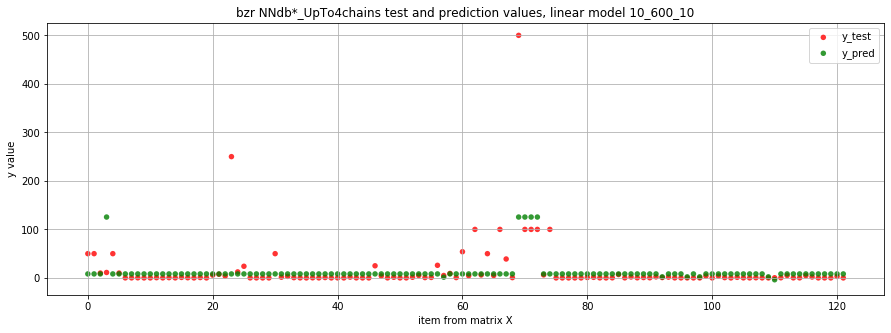

In [121]:
# data = ((np.arange(40, 80), y_test.to_numpy().reshape(-1)[40:80]), (np.arange(40, 80), ridge_soil_pred[2].reshape(-1)[40:80]))
data = ((np.arange(y_test[:].shape[0]), y_test.to_numpy().reshape(-1)[:]), (np.arange(y_test[:].shape[0]), res[scores.index(max(scores))].reshape(-1)[:]))
colors = ("red", "green")
groups = ("y_test", "y_pred")

# Create plot
fig, ax = plt.subplots()
fig.set_figwidth(15)
fig.set_figheight(5)

for data, color, group in zip(data, colors, groups):
    x, y = data
    ax.scatter(x, y, alpha=0.8, c=color, edgecolors='none', s=30, label=group)
#         ax.vlines(x[0], x[1], y[1], color = 'r')

plt.title('bzr NNdb*_UpTo4chains test and prediction values, linear model 10_600_10')
plt.ylabel("y value")
plt.xlabel("item from matrix X")
plt.grid()  
plt.legend(loc=0)
plt.show()

In [17]:
res[scores.index(max(scores))].reshape(-1)[:]

array([65.03955953, 28.46522927,  8.63227253, 45.16730205, 60.96703188,
        2.52348106,  4.55974488,  8.63227253, 24.39270162, 25.39381849,
       24.39270162, 24.39270162, 24.39270162, 24.39270162, 24.39270162,
       20.32017397, 24.39270162, 24.39270162, 24.39270162, 24.39270162,
        8.63227253,  8.63227253,  4.55974488,  6.59600871,  6.59600871,
       65.02101457, 24.39270162, 86.09540164, 24.39270162, 24.39270162,
       24.39270162, 24.39270162, 24.39270162, 24.39270162, 24.39270162,
       24.39270162, 65.00025879, 24.39270162, 24.39270162, 24.39270162,
       24.39270162, 24.39270162, 22.35643779, 24.39270162, 24.39270162,
       24.39270162, 24.39270162, 24.39270162, 18.28391014, 20.32017397,
       20.32017397, 20.32017397, 22.35643779,  0.48721723, 24.39270162,
       24.39270162, 18.24988007, 18.24988007, 24.39270162, 24.39270162,
       60.96703188, 65.03955953, 60.96703188, 60.96703188, 65.03955953,
       65.03955953, 65.03955953, 65.03955953, 65.03955953, 49.23

In [40]:
round_y = []
for i, elem in bzr_y['IC50_uM'].items():
    round_y.append(round(elem))

(array([374.,   9.,  20.,   0.,   0.,   1.,   0.,   0.,   0.,   1.]),
 array([  0.,  50., 100., 150., 200., 250., 300., 350., 400., 450., 500.]),
 <a list of 10 Patch objects>)

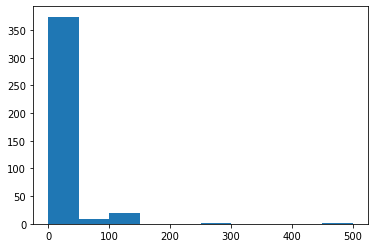

In [47]:
plt.hist(np.array(round_y))

In [52]:

unique, counts = np.unique(np.array(round_y), return_counts=True)

print(np.asarray((unique, counts)).T)

[[  0 283]
 [  1  44]
 [  2  15]
 [  3   3]
 [  4   5]
 [  5   6]
 [  6   3]
 [  7   1]
 [  8   1]
 [  9   1]
 [ 10   4]
 [ 11   1]
 [ 12   1]
 [ 13   1]
 [ 24   1]
 [ 25   1]
 [ 26   1]
 [ 32   1]
 [ 39   1]
 [ 50   8]
 [ 54   1]
 [100  20]
 [250   1]
 [500   1]]


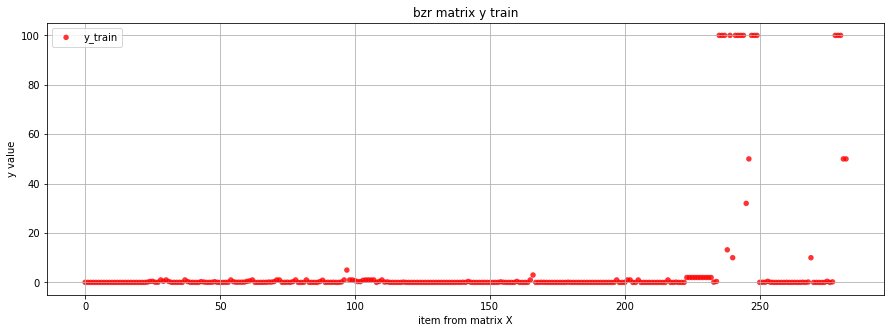

In [45]:
data = ((np.arange(y_train[:].shape[0]), y_train.to_numpy().reshape(-1)[:]), (np.arange(y_test[:].shape[0]), res[scores.index(max(scores))].reshape(-1)[:]))
colors = ("red", "green")
groups = ("y_train", "y_pred")

# Create plot
fig, ax = plt.subplots()
fig.set_figwidth(15)
fig.set_figheight(5)

for data, color, group in zip(data, colors, groups):
    x, y = data
    ax.scatter(x, y, alpha=0.8, c=color, edgecolors='none', s=30, label=group)
    break
#         ax.vlines(x[0], x[1], y[1], color = 'r')

plt.title('bzr matrix y train')
plt.ylabel("y value")
plt.xlabel("item from matrix X")
plt.grid()  
plt.legend(loc=0)
plt.show()